<a href="https://colab.research.google.com/github/lillaszulyovszky/data-science-retreat-lectures/blob/main/MNIST_at_DSR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist

# look at your data

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


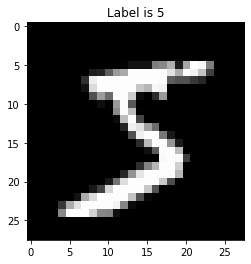

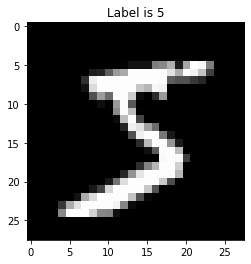

In [4]:
#print(train_images[0])
import matplotlib.pyplot as plt
index = 0
plt.imshow(train_images[index], cmap="gray")
plt.title(f"Label is {train_labels[index]}")
plt.show()
plt.close()

#print(train_images[0])
import matplotlib.pyplot as plt
index = 0
plt.imshow(train_images[index], cmap="gray")
plt.title(f"Label is {train_labels[index]}")
plt.show()
plt.close()

In [5]:
set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

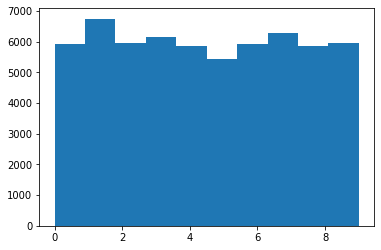

In [6]:
plt.hist(train_labels)
plt.show()

In [42]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
#model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

#model.add(layers.Dropout(0.6))



In [43]:
model.summary()

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"])


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Output: will be batch size

Shape: 28 x 28

Param: if 0 = no weights

could change input_shape to the variable shape

deep network: with at least 1 hidden layer





In [44]:
x_train = train_images.astype("float32") / 255.0
x_test = test_images.astype("float32") / 255.0

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)



(10,)


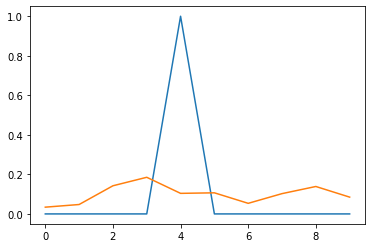

In [45]:
index = 6
prediction = model.predict(x_test[index].reshape((1,28,28)))[0]
print(prediction.shape)
plt.plot(y_test[index])
plt.plot(prediction)

In [46]:
loss, accuracy = model.evaluate(x_test, y_test)
loss, accuracy

313/313 [==============================] - 1s 3ms/step - loss: 2.4251 - accuracy: 0.0807


(2.425075054168701, 0.08070000261068344)

In [47]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.4251 - accuracy: 0.0807


In [48]:
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=128,
    validation_split=0.2
)

Epoch 1/32
375/375 [==============================] - 2s 4ms/step - loss: 0.3999 - accuracy: 0.8897 - val_loss: 0.2130 - val_accuracy: 0.9419
Epoch 2/32
375/375 [==============================] - 1s 4ms/step - loss: 0.1839 - accuracy: 0.9490 - val_loss: 0.1619 - val_accuracy: 0.9542
Epoch 3/32
375/375 [==============================] - 1s 4ms/step - loss: 0.1322 - accuracy: 0.9623 - val_loss: 0.1339 - val_accuracy: 0.9622
Epoch 4/32
375/375 [==============================] - 2s 4ms/step - loss: 0.1019 - accuracy: 0.9709 - val_loss: 0.1127 - val_accuracy: 0.9678
Epoch 5/32
375/375 [==============================] - 2s 4ms/step - loss: 0.0815 - accuracy: 0.9766 - val_loss: 0.1060 - val_accuracy: 0.9693
Epoch 6/32
375/375 [==============================] - 2s 4ms/step - loss: 0.0672 - accuracy: 0.9810 - val_loss: 0.0971 - val_accuracy: 0.9723
Epoch 7/32
375/375 [==============================] - 2s 4ms/step - loss: 0.0560 - accuracy: 0.9843 - val_loss: 0.0910 - val_accuracy: 0.9729
Epoch 

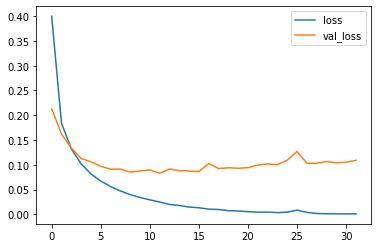

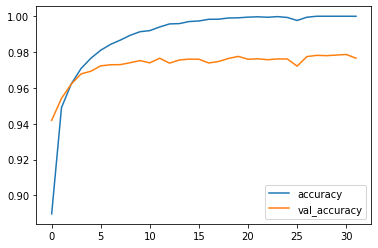

In [49]:
#model.history.history

plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

In [50]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0861 - accuracy: 0.9801


[0.08612672239542007, 0.9800999760627747]

(10,)


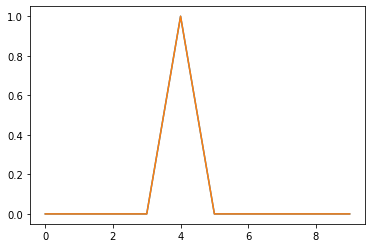

In [51]:
index = 6
prediction = model.predict(x_test[index].reshape((1,28,28)))[0]
print(prediction.shape)
plt.plot(prediction)
plt.plot(y_test[index])
